In [ ]:
# 흑백 영상의 밝기 조절
import cv2
import numpy as np

src = cv2.imread("lenna.bmp", cv2.IMREAD_GRAYSCALE)

dst1 = cv2.add(src, 100)
dst2 = src + 100
# dst2 = np.clip(src + 100.0, 0, 255).astype(np.uint8)

cv2.imshow("original", src)
cv2.imshow("add", dst1)
cv2.imshow("plus 100", dst2)
cv2.waitKey()

-1

src1 shape: (256, 256)
src2 shape: (256, 256)


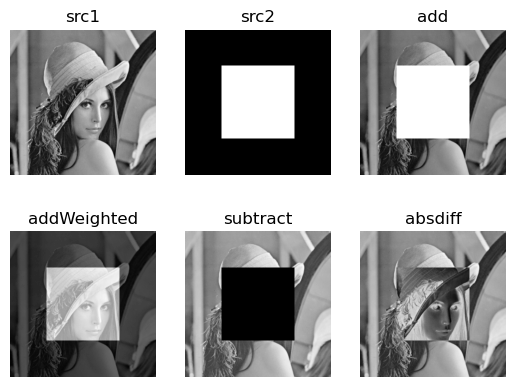

In [11]:
# 영상의 산술연산
import sys
import numpy as np
import cv2
from matplotlib import pyplot as plt


src1 = cv2.imread("lenna256.bmp", cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread("square.bmp", cv2.IMREAD_GRAYSCALE)

if src1 is None or src2 is None:
    print("Image load failed!")
    sys.exit()

print("src1 shape:", src1.shape)
print("src2 shape:", src2.shape)
dst1 = cv2.add(src1, src2, dtype=cv2.CV_8U)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0.0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)

plt.subplot(231), plt.axis("off"), plt.imshow(src1, "gray"), plt.title("src1")
plt.subplot(232), plt.axis("off"), plt.imshow(src2, "gray"), plt.title("src2")
plt.subplot(233), plt.axis("off"), plt.imshow(dst1, "gray"), plt.title("add")
plt.subplot(234), plt.axis("off"), plt.imshow(dst2, "gray"), plt.title("addWeighted")
plt.subplot(235), plt.axis("off"), plt.imshow(dst3, "gray"), plt.title("subtract")
plt.subplot(236), plt.axis("off"), plt.imshow(dst4, "gray"), plt.title("absdiff")
plt.show()

In [1]:
import sys
import numpy as np
import cv2


# 컬러 영상 불러오기
src = cv2.imread("candies.png", cv2.IMREAD_COLOR)

if src is None:
    print("Image load failed!")
    sys.exit()

# 컬러 영상 속성 확인
print("src.shape:", src.shape)  # src.shape: (480, 640, 3)
print("src.dtype:", src.dtype)  # src.dtype: uint8

# RGB 색 평면 분할
b_plane, g_plane, r_plane = cv2.split(src)

# b_plane = src[:, :, 0]
# g_plane = src[:, :, 1]
# r_plane = src[:, :, 2]

cv2.imshow("src", src)
cv2.imshow("B_plane", b_plane)
cv2.imshow("G_plane", g_plane)
cv2.imshow("R_plane", r_plane)
cv2.waitKey()
cv2.destroyAllWindows()

src.shape: (480, 640, 3)
src.dtype: uint8


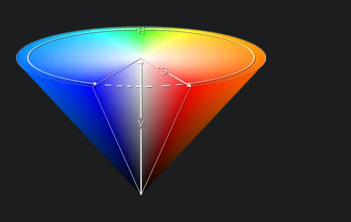<br>
HSV: 색상, 채도, 명도 를 뜻하며 뒤집어 놓은 원뿔로 표현함<br>
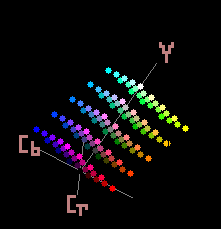<br>
YCrCb

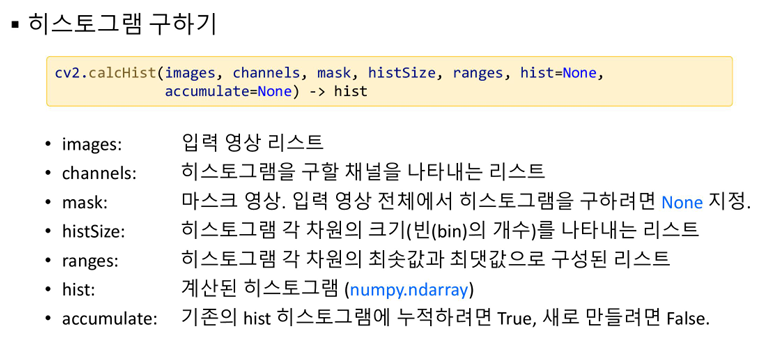

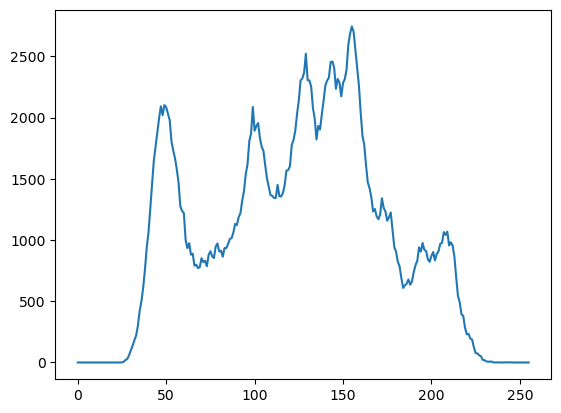

In [ ]:
# 흑백영상 히스토그램 구하기
import cv2
import matplotlib.pyplot as plt

src = cv2.imread("lenna.bmp", cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([src], [0], None, [256], [0, 256])

plt.plot(hist)
plt.show()

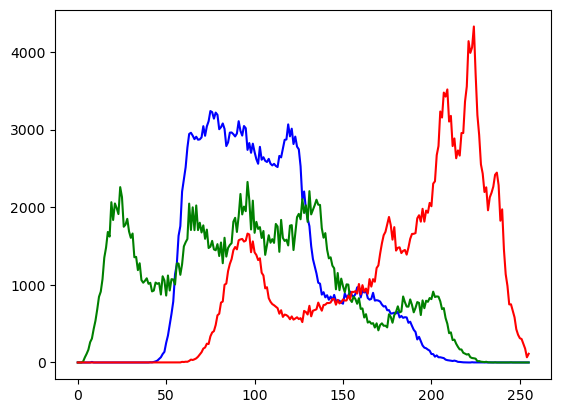

In [5]:
# 컬러 영상의 히스토그램 구하기
# 컬러는 BGR 이 있으므로 각 색을 뽑아내어 표현
# 컬러는 히스토그램 그래프 1개로는 할수없음
import cv2
import matplotlib.pyplot as plt

src = cv2.imread("lenna.bmp")

colors = ["b", "g", "r"]
bgr_planes = cv2.split(src)  # B G R 뽑아냄

for p, c in zip(bgr_planes, colors):
    hist = cv2.calcHist([p], [0], None, [256], [0, 256])
    plt.plot(hist, color=c)

plt.show()

In [10]:
# openCV 그리기 함수로 그레이스케일 영상의 히스토그램 나타내기
import numpy as np
import cv2


def getGrayHistImage(hist):
    imgHist = np.full((100, 256), 255, dtype=np.uint8)

    histMax = np.max(hist)
    for x in range(256):
        pt1 = (x, 100)
        pt2 = (x, 100 - int(hist[x, 0] * 100 / histMax))
        cv2.line(imgHist, pt1, pt2, 0)  # 히스토그램 그리기

    return imgHist


src = cv2.imread("lenna.bmp", cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([src], [0], None, [256], [0, 256])

histImg = getGrayHistImage(hist)
cv2.imshow("lenna", src)
cv2.imshow("graph", histImg)
cv2.waitKey()
cv2.destroyAllWindows()

## 영상의 명암비 조절
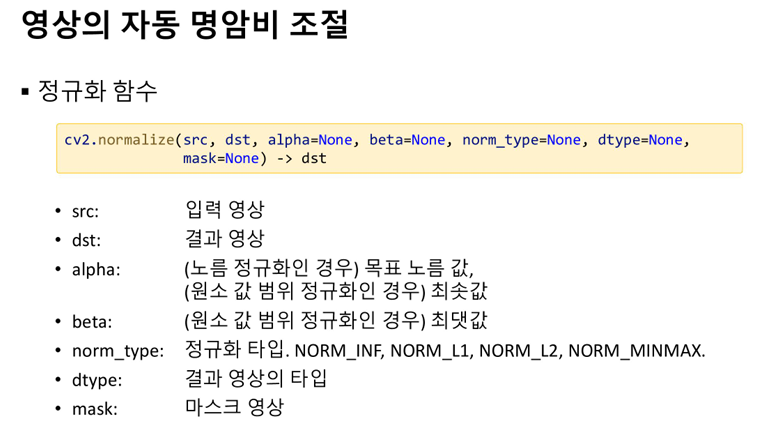

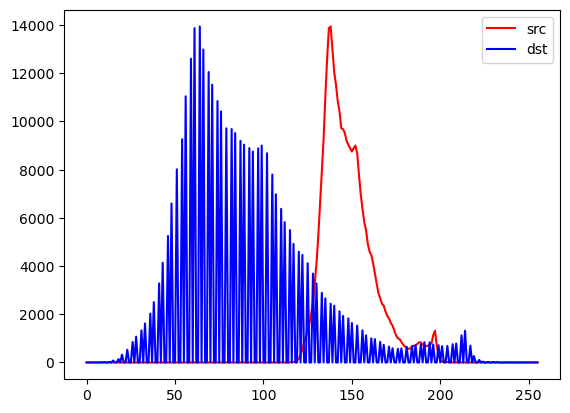

In [ ]:
import cv2
import matplotlib.pyplot as plt

src = cv2.imread("Hawkes.jpg", cv2.IMREAD_GRAYSCALE)

dst = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)

srcHist = cv2.calcHist([src], [0], None, [256], [0, 256])
dstHist = cv2.calcHist([dst], [0], None, [256], [0, 256])
plt.plot(srcHist, "r", label="src")
plt.plot(dstHist, "b", label="dst")
plt.legend()
plt.show()
cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()

cv2.destroyAllWindows()

## 히스토그램 평활화
### 히스토그램 누적 분포 함수
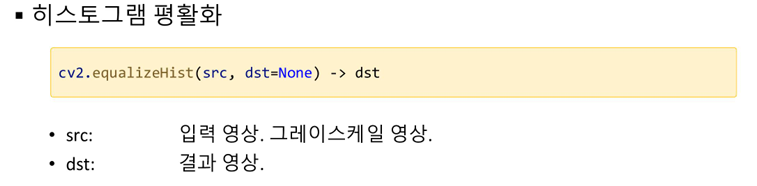

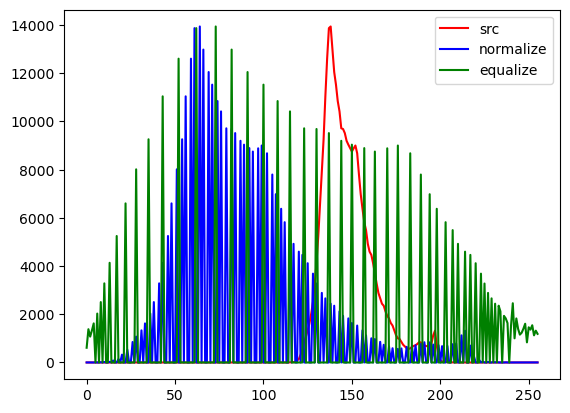

In [19]:
# 명암비 자동 조절과 평활화 둘중에 뭐가 더 좋다고 할수는 없음 둘다 해보고 판단하는게 맞다
import cv2

src = cv2.imread("Hawkes.jpg", cv2.IMREAD_GRAYSCALE)

dst = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)

dst2 = cv2.equalizeHist(src)
srcHist = cv2.calcHist([src], [0], None, [256], [0, 256])
dstHist = cv2.calcHist([dst], [0], None, [256], [0, 256])
dstHist2 = cv2.calcHist([dst2], [0], None, [256], [0, 256])
plt.plot(srcHist, "r", label="src")
plt.plot(dstHist, "b", label="normalize")
plt.plot(dstHist2, "g", label="equalize")
plt.legend()
plt.show()
cv2.imshow("src", src)
cv2.imshow("normalize", dst)
cv2.imshow("equalize", dst2)
cv2.waitKey()

cv2.destroyAllWindows()

In [ ]:
# 평활화 실습
# 컬러의 경우 B R G 각각 적용해주어야함
import cv2

src = cv2.imread("field.bmp")
src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
# 해당픽셀은 y cr cb 가 있지만 0 만 지정해 y 만 바꿈
src_ycrcb[:, :, 0] = cv2.equalizeHist(src_ycrcb[:, :, 0])

dst = cv2.cvtColor(src_ycrcb, cv2.COLOR_YCrCb2BGR)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 특정 색상 영역 추출
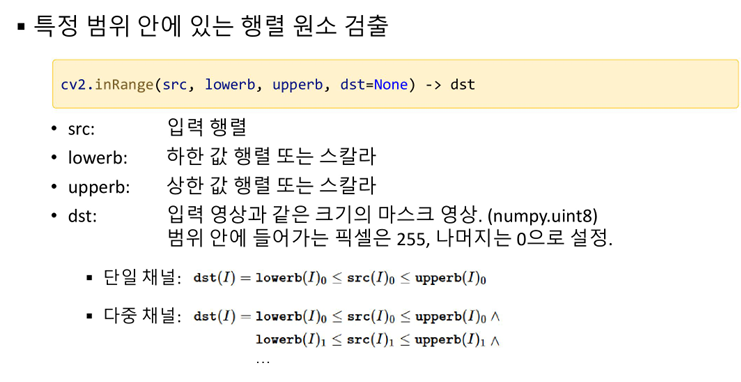

In [ ]:
import cv2

src = cv2.imread("candies.png")
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)


def on_trackbar(pos):
    hmin = cv2.getTrackbarPos("H_min", "dst")
    hmax = cv2.getTrackbarPos("H_max", "dst")

    # h s v 중 h 만 변경함
    dst = cv2.inRange(src_hsv, (hmin, 150, 0), (hmax, 255, 255))
    cv2.imshow("dst", dst)


cv2.imshow("src", src)
cv2.namedWindow("dst")

cv2.createTrackbar("H_min", "dst", 50, 178, on_trackbar)
cv2.createTrackbar("H_max", "dst", 80, 179, on_trackbar)
on_trackbar(0)
cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:868: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


In [9]:
import sys
import numpy as np
import cv2


# 녹색 배경 동영상
cap1 = cv2.VideoCapture("woman.mp4")

if not cap1.isOpened():
    print("video open failed!")
    sys.exit()

# 비오는 배경 동영상
cap2 = cv2.VideoCapture("raining.mp4")

if not cap2.isOpened():
    print("video open failed!")
    sys.exit()

# 두 동영상의 크기, FPS는 같다고 가정
frame_cnt1 = round(cap1.get(cv2.CAP_PROP_FRAME_COUNT))
frame_cnt2 = round(cap2.get(cv2.CAP_PROP_FRAME_COUNT))
print("frame_cnt1:", frame_cnt1)
print("frame_cnt2:", frame_cnt2)

fps = cap1.get(cv2.CAP_PROP_FPS)
delay = int(1000 / fps)

# 합성 여부 플래그
do_composit = False

# 전체 동영상 재생
while True:
    ret1, frame1 = cap1.read()

    if not ret1:
        break

    # do_composit 플래그가 True일 때에만 합성
    if do_composit:
        ret2, frame2 = cap2.read()

        if not ret2:
            break

        # HSV 색 공간에서 녹색 영역을 검출하여 합성
        hsv = cv2.cvtColor(frame1, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv, (50, 150, 0), (70, 255, 255))
        cv2.copyTo(frame2, mask, frame1)

    cv2.imshow("frame", frame1)
    key = cv2.waitKey(delay)

    # 스페이스바를 누르면 do_composit 플래그를 변경
    if key == ord(" "):
        do_composit = not do_composit
    elif key == 27:
        break

cap1.release()
cap2.release()
cv2.destroyAllWindows()

frame_cnt1: 409
frame_cnt2: 353


# 필터링
* 영상에서 필요한 정보만 통과시키고 원치 않는 정보는 걸러내는 작업
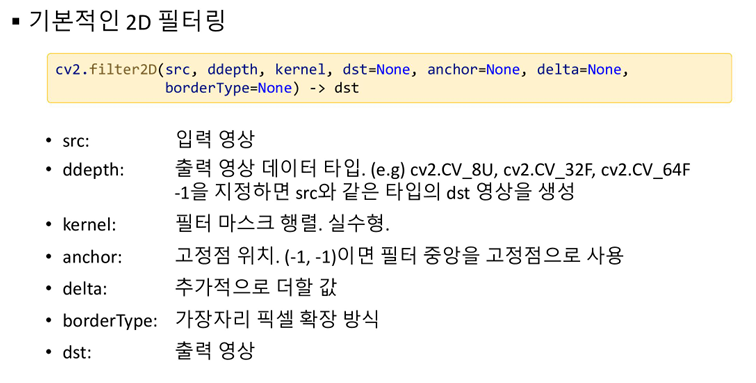

## 블러링
### 평균값 필터
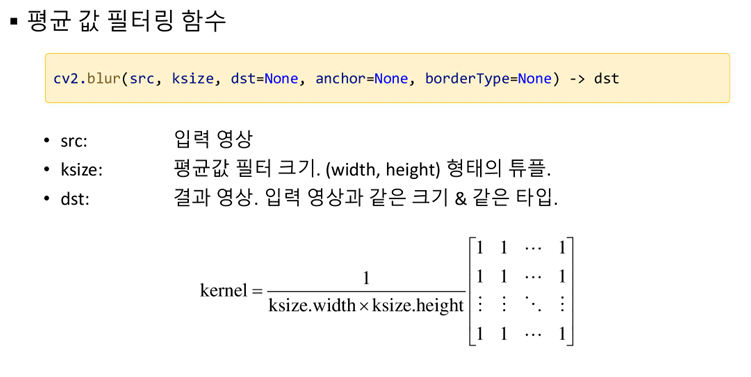

In [21]:
src = cv2.imread("rose.bmp", cv2.IMREAD_GRAYSCALE)

cv2.imshow("src", src)

for ksize in (3, 5, 7):
    dst = cv2.blur(src, (ksize, ksize))

    desc = "Mean : {}x{}".format(ksize, ksize)
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, 255, 1, cv2.LINE_AA)
    cv2.imshow("dst", dst)
    cv2.waitKey()

cv2.destroyAllWindows()

### 가우시안 필터
* 평균값 필터에 의한 블러링 단점을 보완하기 위해 사용함
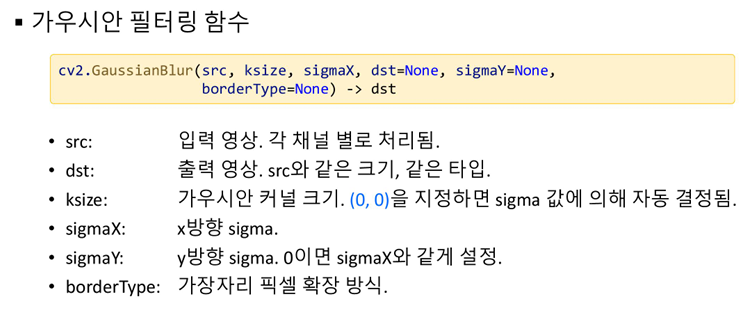

* 평균값 블러링와 가우시안 블러링의 차이
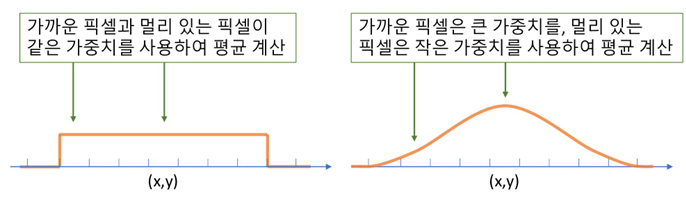

In [2]:
import cv2

src = cv2.imread("rose.bmp", cv2.IMREAD_GRAYSCALE)

cv2.imshow("src", src)

for sigma in range(1, 6):
    dst = cv2.GaussianBlur(src, (0, 0), sigma)

    desc = "sigma : {}".format(sigma)
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, 255, 1, cv2.LINE_AA)
    cv2.imshow("dst", dst)
    cv2.waitKey()

cv2.destroyAllWindows()

## 샤프닝
* 부드러운 영상을 날카로운 느낌으로 변형
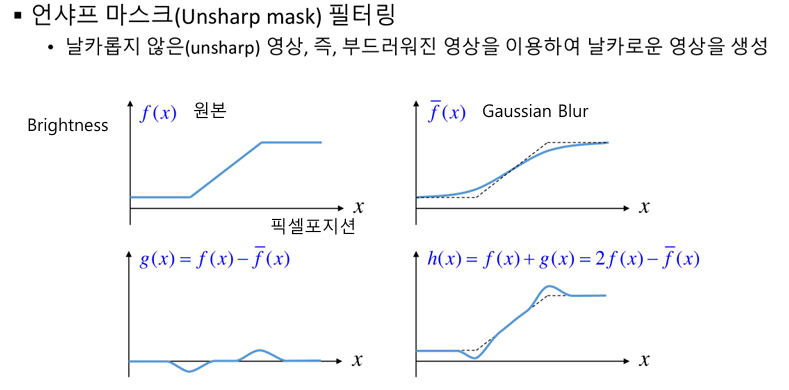

In [7]:
import cv2
import numpy as np

src = cv2.imread("rose.bmp", cv2.IMREAD_GRAYSCALE)

src_f = src.astype(np.float32)
blr = cv2.GaussianBlur(src_f, (0, 0), 2.0)
dst = np.clip(2.0 * src_f - blr, 0, 255).astype(np.uint8)

cv2.imshow("src", src)
cv2.imshow("dst", dst)

cv2.waitKey()
cv2.destroyAllWindows()

### 컬러 영상에 샤프닝 구현하기

In [14]:
import sys
import numpy as np
import cv2

src = cv2.imread("rose.bmp")

if src is None:
    print("Image load failed!")
    sys.exit()

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

# Ycrcb 중 Y채널만 변경함
src_f = src_ycrcb[:, :, 0].astype(np.float32)
blr = cv2.GaussianBlur(src_f, (0, 0), 2.0)
src_ycrcb[:, :, 0] = np.clip(2.0 * src_f - blr, 0, 255).astype(np.uint8)

dst = cv2.cvtColor(src_ycrcb, cv2.COLOR_YCrCb2BGR)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()

cv2.destroyAllWindows()

## 잡음(Noise) 제거
### 미디언필터
* 소금, 후추 필터에 효과적임
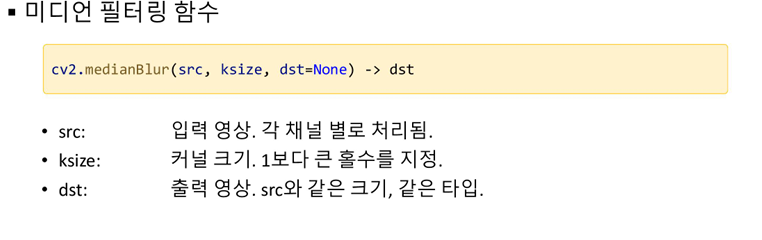

In [15]:
import cv2

src = cv2.imread("noise.bmp", cv2.IMREAD_GRAYSCALE)
dst = cv2.medianBlur(src, 3)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

### 양방향 필터
* 에지 보전 잡음 제거 필터 의 하나
* 평균값, 가우시안 필터는 에지 부근에서도 픽셀값을 평탄하게 만듬
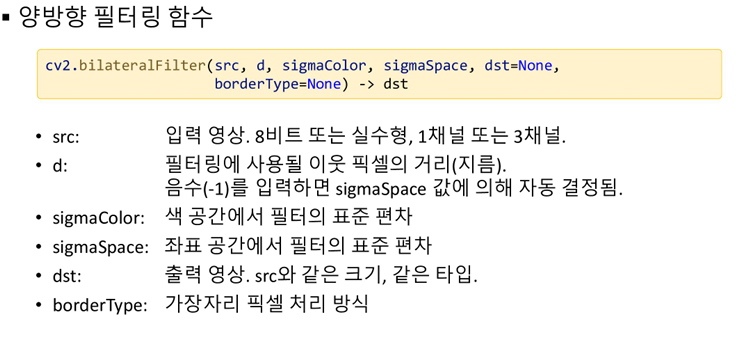

In [ ]:
import cv2

src = cv2.imread("lenna.bmp")

dst1 = cv2.GaussianBlur(src, (0, 0), 5)
dst2 = cv2.bilateralFilter(src, -1, 10, 5)


cv2.imshow("src", src)
cv2.imshow("dst1", dst1)
cv2.imshow("dst2", dst2)

cv2.waitKey()
cv2.destroyAllWindows()

# 기하학적 변환

## 영상의 이동변환
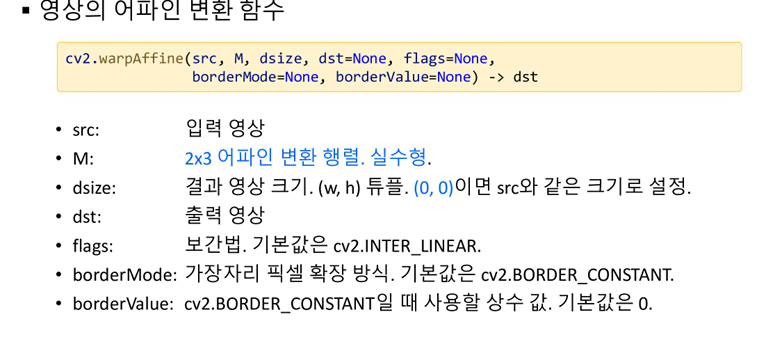

In [8]:
import cv2
import numpy as np

src = cv2.imread("tekapo.bmp")

aff = np.array([[1, 0, 200], [0, 1, 100]], dtype=np.float32)

dst = cv2.warpAffine(src, aff, (0, 0))

cv2.imshow("src", src)
cv2.imshow("dst", dst)

cv2.waitKey()
cv2.destroyAllWindows()

### 전단 변환

In [1]:
import cv2
import numpy as np

src = cv2.imread("tekapo.bmp")

aff = np.array([[1, 0.5, 0], [0, 1, 0]], dtype=np.float32)

h, w = src.shape[:2]
dst = cv2.warpAffine(src, aff, (w + int(h * 0.5), h))
dst1 = cv2.warpAffine(src, aff, (0, 0))

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.imshow("dst1", dst1)

cv2.waitKey()
cv2.destroyAllWindows()

## 영상의 확대와 축소

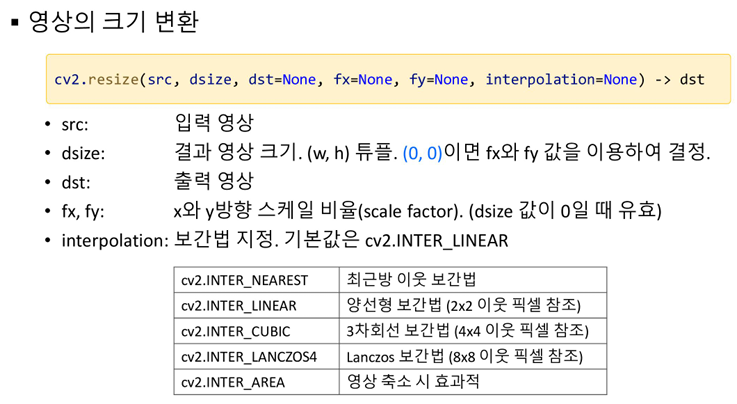

In [ ]:
import cv2
import numpy as np

src = cv2.imread("rose.bmp")
print("src shape: ", src.shape)

dst1 = cv2.resize(src, (0, 0), fx=4, fy=4, interpolation=cv2.INTER_NEAREST)
dst2 = cv2.resize(src, (1920, 1280))
dst3 = cv2.resize(src, (1920, 1280), interpolation=cv2.INTER_CUBIC)
dst4 = cv2.resize(src, (1920, 1280), interpolation=cv2.INTER_LANCZOS4)

# wrapAffine 함수로 확대 해보기
# affine = np.array([[4, 0, 0], [0, 4, 0]], dtype=np.float32)
# dst2 = cv2.warpAffine(src, affine, (480 * 4, 320 * 4))


cv2.imshow("src", src)
cv2.imshow("dst1", dst1[500:900, 400:800])
cv2.imshow("dst2", dst2[500:900, 400:800])
cv2.imshow("dst3", dst3[500:900, 400:800])
cv2.imshow("dst4", dst4[500:900, 400:800])
cv2.waitKey()

cv2.destroyAllWindows()

src shape:  (320, 480, 3)


### 영상의 대칭
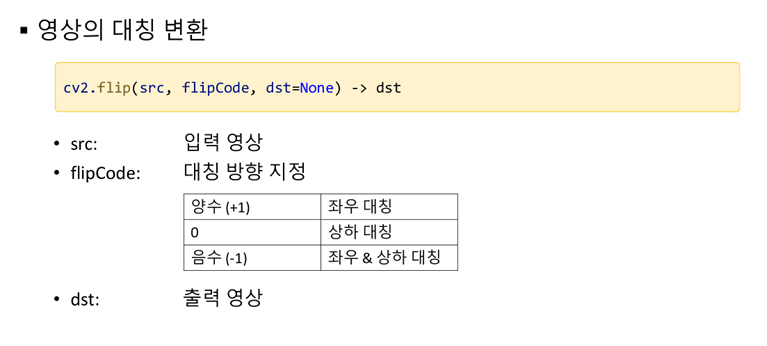
* 좌우대칭 : 양수
* 상하대칭 : 0
* 좌우 & 상하 대칭 : 음수

In [11]:
import cv2
import numpy as np

src = cv2.imread("rose.bmp")

dst = cv2.flip(src, 1)
dst1 = cv2.flip(src, 0)
dst2 = cv2.flip(src, -1)

cv2.imshow("src", src)
cv2.imshow("+dst", dst)
cv2.imshow("0dst", dst1)
cv2.imshow("-dst", dst2)
cv2.waitKey()

cv2.destroyAllWindows()

## 이미지 피라미드
* 큰 이미지를 작게 : 다운샘플림
* 작은 이미지를 크게 : 업샘플링

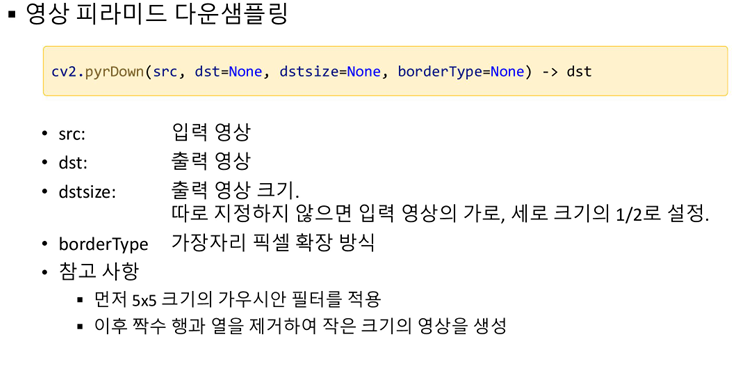
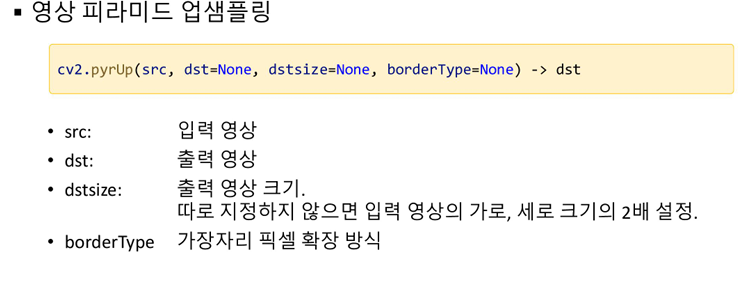

In [8]:
import cv2

src = cv2.imread("cat.bmp")

rc = (250, 120, 200, 200)

cpy = src.copy()
cv2.rectangle(cpy, rc, (0, 0, 255), 2)
cv2.imshow("src", cpy)
cv2.waitKey()

for i in range(1, 4):
    src = cv2.pyrDown(src)
    cpy = src.copy()
    cv2.rectangle(cpy, rc, (0, 0, 255), 2, shift=i)
    cv2.imshow("src", cpy)
    cv2.waitKey()

cv2.destroyAllWindows()

## 영상의 회전
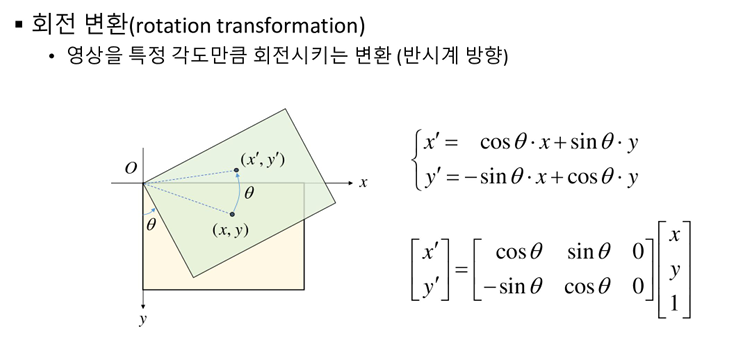

In [11]:
import math
import cv2
import numpy as np

# 영상 20도 회전하기

src = cv2.imread("tekapo.bmp")

rad = 20 * math.pi / 180
aff = np.array(
    [[math.cos(rad), math.sin(rad), 0], [-math.sin(rad), math.cos(rad), 0]],
    dtype=np.float32,
)

dst = cv2.warpAffine(src, aff, (0, 0))

cv2.imshow("src", src)
cv2.imshow("dst", dst)

cv2.waitKey()
cv2.destroyAllWindows()

* 위의 코드는 별도의 함수를 사용한것이 아님<br>
회전은 getRotationMatrix2D를 사용하여 더 쉽게 활용 가능
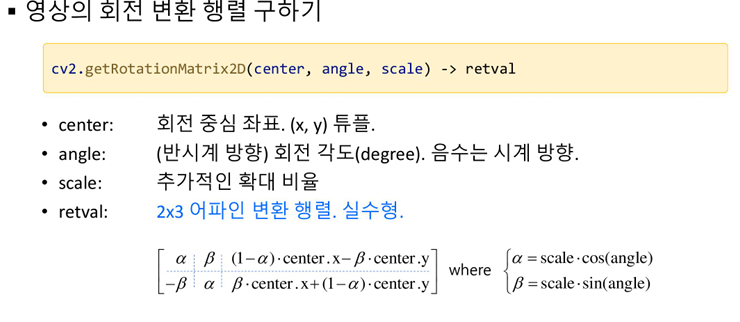

In [27]:
import cv2
import numpy as np

src = cv2.imread("tekapo.bmp")
cp = (src.shape[1] / 2, src.shape[0] / 2)
rot = cv2.getRotationMatrix2D(cp, 20, 1)

dst = cv2.warpAffine(src, rot, (0, 0))

cv2.imshow("src", src)
cv2.imshow("dst", dst)

cv2.waitKey()
cv2.destroyAllWindows()

## 어파인 변환과 투시 변환
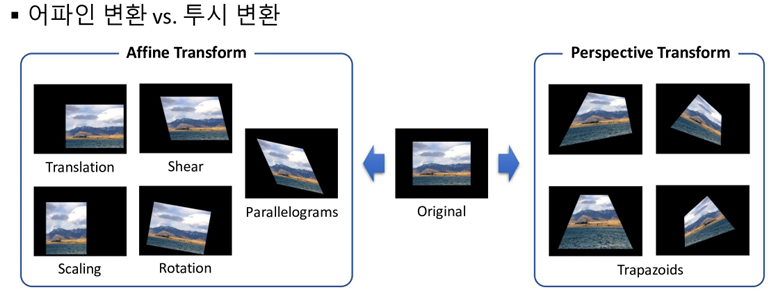

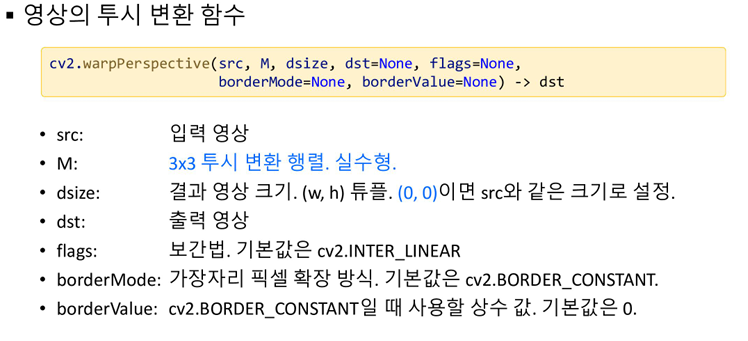

In [26]:
# 투시변환 예제
# 찌그러진 명함 피기
import cv2
import numpy as np

src = cv2.imread("namecard.jpg")
w, h = 720, 400

srcQuad = np.array([[222, 95], [622, 178], [547, 416], [145, 317]], np.float32)
dstQuad = np.array([[0, 0], [w - 1, 0], [w - 1, h - 1], [0, h - 1]], dtype=np.float32)

pers = cv2.getPerspectiveTransform(srcQuad, dstQuad)
dst = cv2.warpPerspective(src, pers, (w, h))

cv2.imshow("src", src)
cv2.imshow("dst", dst)

cv2.waitKey()
cv2.destroyAllWindows()

## 기하학적 변환
### 리매핑
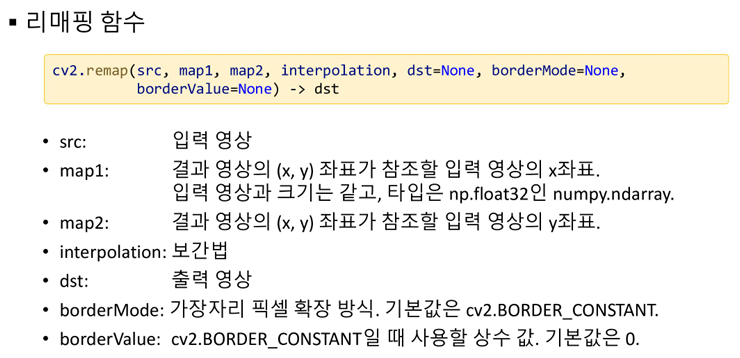

In [41]:
# 삼각함수를 이용한 리매핑 예제
src = cv2.imread("tekapo.bmp")

h, w = src.shape[:2]
map2, map1 = np.indices((h, w), dtype=np.float32)
print(f"map1 : {map1[0:3, 0:3]}")
print(f"map2 : {map2[0:3, 0:3]}")
map2 = map2 + 10 * np.sin(map1 / 32)

dst = cv2.remap(src, map1, map2, cv2.INTER_CUBIC, borderMode=cv2.BORDER_DEFAULT)

cv2.imshow("src", src)
cv2.imshow("dst", dst)

cv2.waitKey()
cv2.destroyAllWindows()

map1 : [[0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]]
map2 : [[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]]


In [ ]:
# 문서 스캐너 예제
import sys
import numpy as np
import cv2


def drawROI(img, corners):
    cpy = img.copy()

    c1 = (192, 192, 255)
    c2 = (128, 128, 255)

    for pt in corners:
        cv2.circle(cpy, tuple(pt.astype(int)), 25, c1, -1, cv2.LINE_AA)

    cv2.line(
        cpy,
        tuple(corners[0].astype(int)),
        tuple(corners[1].astype(int)),
        c2,
        2,
        cv2.LINE_AA,
    )
    cv2.line(
        cpy,
        tuple(corners[1].astype(int)),
        tuple(corners[2].astype(int)),
        c2,
        2,
        cv2.LINE_AA,
    )
    cv2.line(
        cpy,
        tuple(corners[2].astype(int)),
        tuple(corners[3].astype(int)),
        c2,
        2,
        cv2.LINE_AA,
    )
    cv2.line(
        cpy,
        tuple(corners[3].astype(int)),
        tuple(corners[0].astype(int)),
        c2,
        2,
        cv2.LINE_AA,
    )

    disp = cv2.addWeighted(img, 0.3, cpy, 0.7, 0)

    return disp


def onMouse(event, x, y, flags, param):
    global srcQuad, dragSrc, ptOld, src

    if event == cv2.EVENT_LBUTTONDOWN:
        for i in range(4):
            if cv2.norm(srcQuad[i] - (x, y)) < 25:
                dragSrc[i] = True
                ptOld = (x, y)
                break

    if event == cv2.EVENT_LBUTTONUP:
        for i in range(4):
            dragSrc[i] = False

    if event == cv2.EVENT_MOUSEMOVE:
        for i in range(4):
            if dragSrc[i]:
                dx = x - ptOld[0]
                dy = y - ptOld[1]

                srcQuad[i] += (dx, dy)

                cpy = drawROI(src, srcQuad)
                cv2.imshow("img", cpy)
                ptOld = (x, y)
                break


# 입력 이미지 불러오기
src = cv2.imread("scanned.jpg")

if src is None:
    print("Image open failed!")
    sys.exit()

# 입력 영상 크기 및 출력 영상 크기
h, w = src.shape[:2]
dw = 500
dh = round(dw * 297 / 210)  # A4 용지 크기: 210x297cm

# 모서리 점들의 좌표, 드래그 상태 여부
srcQuad = np.array([[30, 30], [30, h - 30], [w - 30, h - 30], [w - 30, 30]], np.float32)
dstQuad = np.array([[0, 0], [0, dh - 1], [dw - 1, dh - 1], [dw - 1, 0]], np.float32)
dragSrc = [False, False, False, False]

# 모서리점, 사각형 그리기
disp = drawROI(src, srcQuad)

cv2.imshow("img", disp)
cv2.setMouseCallback("img", onMouse)

while True:
    key = cv2.waitKey()
    if key == 13:  # ENTER 키
        break
    elif key == 27:  # ESC 키
        cv2.destroyWindow("img")
        sys.exit()

# 투시 변환
pers = cv2.getPerspectiveTransform(srcQuad, dstQuad)
dst = cv2.warpPerspective(src, pers, (dw, dh), flags=cv2.INTER_CUBIC)

# 결과 영상 출력
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

# 영상의 특징 추출

## 소벨필터를 이용한 미분 함수
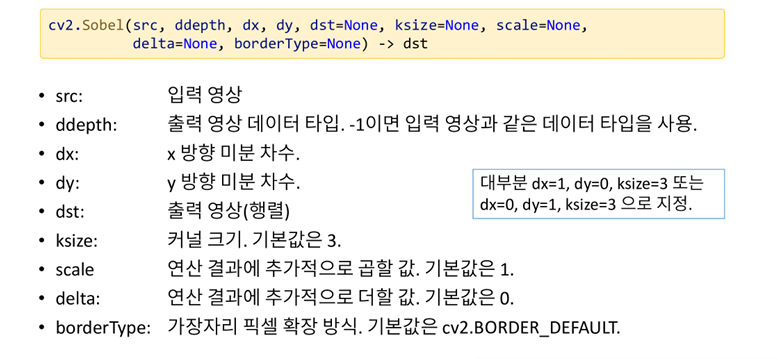

# 영상의 특징 추출


## 허프변환 : 원검출
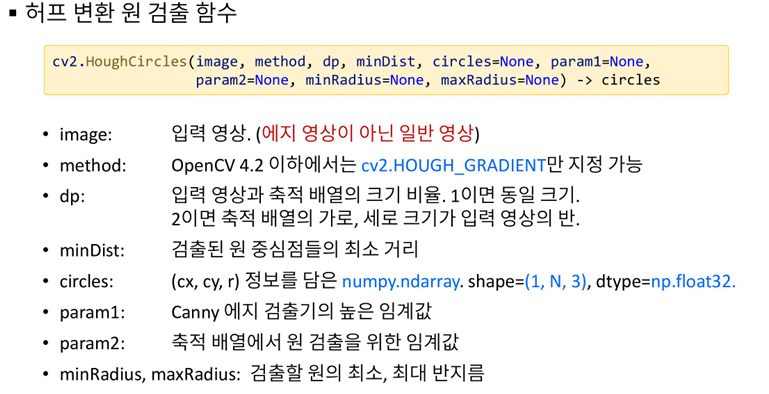

In [27]:
import sys
import numpy as np
import cv2


# 입력 이미지 불러오기
src = cv2.imread("dial.jpg")

if src is None:
    print("Image open failed!")
    sys.exit()

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blr = cv2.GaussianBlur(gray, (0, 0), 1.0)  # sigma = 1.0 표준편차를 1 로 부여함


def on_trackbar(pos):
    rmin = cv2.getTrackbarPos("minRadius", "img")
    rmax = cv2.getTrackbarPos("maxRadius", "img")
    th = max(1, cv2.getTrackbarPos("threshold", "img"))

    circles = cv2.HoughCircles(
        blr,
        cv2.HOUGH_GRADIENT,
        1,
        50,
        param1=120,
        param2=th,
        minRadius=rmin,
        maxRadius=rmax,
    )
    dst = src.copy()
    if circles is not None:
        for i in range(circles.shape[1]):
            cx, cy, radius = np.uint16(circles[0][i])
            cv2.circle(dst, (cx, cy), radius, (0, 0, 255), 2, cv2.LINE_AA)

    cv2.imshow("img", dst)


# 트랙바 생성
cv2.imshow("img", src)
cv2.createTrackbar("minRadius", "img", 0, 100, on_trackbar)
cv2.createTrackbar("maxRadius", "img", 0, 150, on_trackbar)
cv2.createTrackbar("threshold", "img", 0, 100, on_trackbar)
cv2.setTrackbarPos("minRadius", "img", 10)
cv2.setTrackbarPos("maxRadius", "img", 80)
cv2.setTrackbarPos("threshold", "img", 40)
cv2.waitKey()

cv2.destroyAllWindows()

In [30]:
# 동전카운터 실전문제

import sys
import numpy as np
import cv2


# 입력 이미지 불러오기
src = cv2.imread("coins1.jpg")

if src is None:
    print("Image open failed!")
    sys.exit()

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blr = cv2.GaussianBlur(gray, (0, 0), 1)

# 허프 변환 원 검출
circles = cv2.HoughCircles(
    blr, cv2.HOUGH_GRADIENT, 1, 50, param1=150, param2=40, minRadius=20, maxRadius=80
)

# 원 검출 결과 및 동전 금액 출력
sum_of_money = 0
dst = src.copy()
if circles is not None:
    for i in range(circles.shape[1]):
        cx, cy, radius = np.uint16(circles[0][i])
        cv2.circle(dst, (cx, cy), radius, (0, 0, 255), 2, cv2.LINE_AA)

        # 동전 영역 부분 영상 추출
        x1 = int(cx - radius)
        y1 = int(cy - radius)
        x2 = int(cx + radius)
        y2 = int(cy + radius)
        radius = int(radius)

        crop = dst[y1:y2, x1:x2, :]
        ch, cw = crop.shape[:2]

        # 동전 영역에 대한 ROI 마스크 영상 생성
        mask = np.zeros((ch, cw), np.uint8)
        cv2.circle(mask, (cw // 2, ch // 2), radius, 255, -1)

        # 동전 영역 Hue 색 성분을 +40 시프트하고, Hue 평균을 계산
        hsv = cv2.cvtColor(crop, cv2.COLOR_BGR2HSV)
        hue, _, _ = cv2.split(hsv)
        hue_shift = (hue + 40) % 180
        mean_of_hue = cv2.mean(hue_shift, mask)[0]

        # Hue 평균이 90보다 작으면 10원, 90보다 크면 100원으로 간주
        won = 100
        if mean_of_hue < 90:
            won = 10

        sum_of_money += won

        cv2.putText(
            crop,
            str(won),
            (20, 50),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.75,
            (255, 0, 0),
            2,
            cv2.LINE_AA,
        )

cv2.putText(
    dst,
    str(sum_of_money) + " won",
    (40, 80),
    cv2.FONT_HERSHEY_DUPLEX,
    2,
    (255, 0, 0),
    2,
    cv2.LINE_AA,
)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()

cv2.destroyAllWindows()